In [37]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import time

In [38]:
plt.style.use('seaborn') #plt.style.use('seaborn')

## Data extraction

In [39]:
import os

In [40]:
DATA_ROOT = './models'

In [51]:
model_names = os.listdir(DATA_ROOT)

In [52]:
model_names.remove('V7.txt')

ES.txt
24
S1.txt
60
S2.txt
25
S3.txt
30
V1.txt
25
V2.txt
25
V3.txt
25
V4.txt
25
V5.txt
25
V6.txt
25
W1.txt
25
W2.txt
25


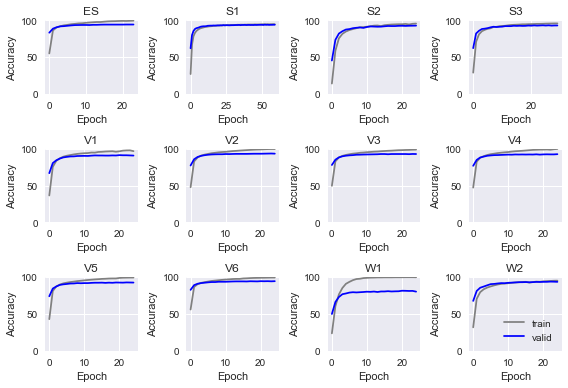

In [53]:
x, y = 3,4
pos = 1,2,3,4,5,6,7,8,9,10,11,12


for i, model_name in zip(pos, model_names):
    print(model_name)
    model_performance_raw = open(f'{DATA_ROOT}/{model_name}').readlines()
    epoch_data = list()
    epoch = 0
    train = None
    valid = None

    for line in model_performance_raw:

        if line.startswith('|'):
            i1, i2 = line.find('=')+1, line.find('%')
            
            if 'train' in line:
                train = float(line[i1:i2])
            elif 'valid' in line:
                valid = float(line[i1:i2])
                epoch_data.append({'epoch':epoch, 'train':train, 'valid':valid})
                epoch += 1
    print(len(epoch_data))
    epoch_df = pd.DataFrame(epoch_data, dtype=float)
    
    ## PLOT
    plt.subplot(x, y, i)
    
    """
    groups = df.groupby("dataset")
    for name, group in groups:
        if name == 'training':
            plt.plot(group.num_updates, group.accuracy, '-', label=name)
        else:
            plt.plot(group.num_updates, group.accuracy, '-o', label=name)
    plt.xlabel('Number of updates')
    plt.ylabel('Accuracy (%)')
    plt.title(model_name[:-4])

    """
    a, = plt.plot(epoch_df.epoch, epoch_df.train, 'gray')
    b, = plt.plot(epoch_df.epoch, epoch_df.valid, 'blue')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(model_name[:-4])
    plt.ylim(0,100)

plt.legend([a,b],['train','valid'])
plt.tight_layout()
plt.savefig(f'./src/accuracy-all.png')


## Accuracy test bars

In [24]:
models_stats = pd.read_csv('models-general-stats.csv')
models_stats['execution_time'] = models_stats['execution_time'].apply(lambda t: t/3600)

In [25]:
models_stats.head()

,model,execution_time,public_score
0,S1,4.849500,94.300
1,S2,1.262389,92.900
2,S3,1.442333,93.400
3,V1,0.786361,87.202
4,V2,0.770528,93.906


(80, 100)

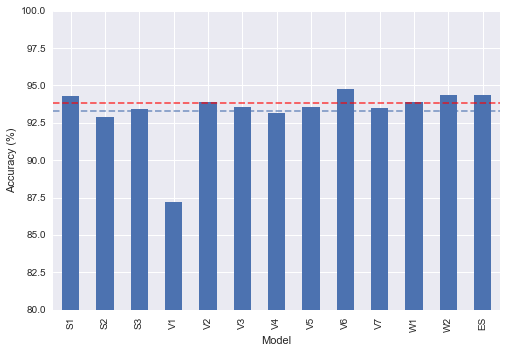

In [35]:
models_stats = models_stats[models_stats.model!='BASE']
ax = models_stats.plot.bar(x='model', y='public_score', legend=False)
ax.axhline(models_stats.public_score.mean(), ls='--', alpha=.65)
ax.axhline(93.8, ls='--', c='red', alpha=.65)
ax.set_ylabel('Accuracy (%)')
ax.set_xlabel('Model')
ax.set_ylim(80,100)

Text(0.5, 0, 'Model')

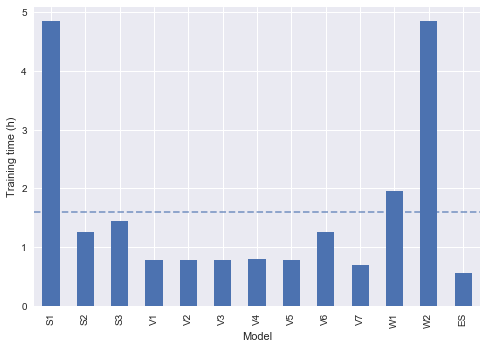

In [31]:
models_stats = models_stats[models_stats.model!='BASE']
ax = models_stats.plot.bar(x='model', y='execution_time', legend=False)
ax.axhline(models_stats.execution_time.mean(), ls='--', alpha=.65)
ax.set_ylabel('Training time (h)')
ax.set_xlabel('Model')

Text(0.5, 0, 'Model')

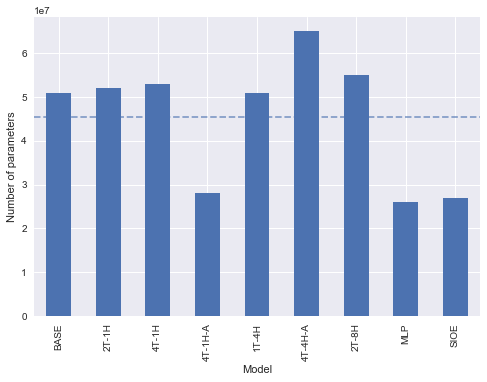

In [61]:
ax = models_stats.plot.bar(x='model', y='n_params', legend=False)
ax.axhline(models_stats.n_params.mean(), ls='--', alpha=.65)
ax.set_ylabel('Number of parameters')
ax.set_xlabel('Model')

0 model               2T-1H
execution_time    4.18883
public_score      0.33583
n_params          5.2e+07
Name: 0, dtype: object
1 model               4T-1H
execution_time    5.02789
public_score      0.34166
n_params          5.3e+07
Name: 1, dtype: object
2 model             4T-1H-A
execution_time    4.49403
public_score      0.32666
n_params          2.8e+07
Name: 2, dtype: object
3 model               1T-4H
execution_time    3.80806
public_score      0.33583
n_params          5.1e+07
Name: 3, dtype: object
4 model             4T-4H-A
execution_time    6.90022
public_score      0.23766
n_params          6.5e+07
Name: 4, dtype: object
5 model               2T-8H
execution_time    5.73969
public_score      0.34085
n_params          5.5e+07
Name: 5, dtype: object
6 model                 MLP
execution_time    2.57097
public_score      0.30264
n_params          2.6e+07
Name: 6, dtype: object
7 model                SIOE
execution_time    3.61567
public_score       0.3135
n_params         

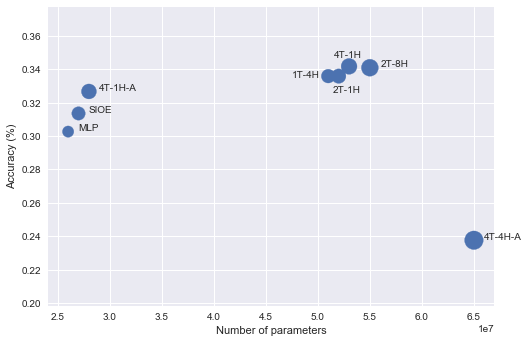

In [101]:
ax = models_stats.plot.scatter(x='n_params', y='public_score', s=models_stats['execution_time']*50)
ax.set_xlabel('Number of parameters')
ax.set_ylabel('Accuracy (%)')
for i, row in models_stats.iterrows():
    print(i, row)
    if row.model == '4T-1H':
        ax.annotate(row.model, (row.n_params-1.5e6, row.public_score+0.005))
    elif row.model == '2T-1H':
        ax.annotate(row.model, (row.n_params-.6e6, row.public_score-0.01))
    elif row.model == '1T-4H':
        ax.annotate(row.model, (row.n_params-3.5e6, row.public_score-0.001))
    else:
        ax.annotate(row.model, (row.n_params+1e6, row.public_score+0.0005))